### Import required libraries

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

### Create and connect to new db

In [3]:
conn = sqlite3.connect("sales_data.db")
cursor=conn.cursor()

### Create a sales table

In [8]:
cursor.execute("""
CREATE TABLE sales (
    sale_ID INTEGER,
    product TEXT,
    category TEXT,
    region TEXT,
    quantity INTEGER,
    price REAL,
    sale_date TEXT
)
""")


### Insert data into the table

In [12]:
data = [
    (1, 'Product A', 'Electronics', 'North', 10, 299.99, '2025-06-01'),
    (2, 'Product B', 'Clothing', 'South', 5, 149.50, '2025-06-02'),
    (3, 'Product C', 'Electronics', 'East', 8, 349.99, '2025-06-03'),
    (4, 'Product A', 'Electronics', 'West', 6, 299.99, '2025-06-04'),
    (5, 'Product D', 'Furniture', 'North', 3, 899.00, '2025-06-01'),
    (6, 'Product E', 'Clothing', 'South', 12, 99.00, '2025-06-03'),
    (7, 'Product B', 'Clothing', 'East', 4, 149.50, '2025-06-02'),
    (8, 'Product F', 'Furniture', 'West', 2, 1200.00, '2025-06-05'),
    (9, 'Product A', 'Electronics', 'North', 7, 299.99, '2025-06-06'),
    (10, 'Product D', 'Furniture', 'East', 5, 899.00, '2025-06-03'),
    (11, 'Product E', 'Clothing', 'West', 6, 99.00, '2025-06-04'),
    (12, 'Product C', 'Electronics', 'South', 9, 349.99, '2025-06-05'),
    (13, 'Product B', 'Clothing', 'North', 3, 149.50, '2025-06-05'),
    (14, 'Product G', 'Furniture', 'South', 1, 2000.00, '2025-06-06'),
    (15, 'Product F', 'Furniture', 'North', 2, 1200.00, '2025-06-07')
]

cursor.executemany("""
INSERT into sales (sale_ID, product, category, region, quantity, price, sale_date)
VALUES(?,?,?,?,?,?,?)
""",data)

conn.commit()


## SQL Queries

### Total Revenue per Product

In [13]:
query1 = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
"""

df1 = pd.read_sql_query(query1, conn)
print(df1)


     product  total_qty   revenue
0  Product D         16  14384.00
1  Product A         46  13799.54
2  Product C         34  11899.66
3  Product F          8   9600.00
4  Product G          2   4000.00
5  Product B         24   3588.00
6  Product E         36   3564.00


### Visualization using barchart

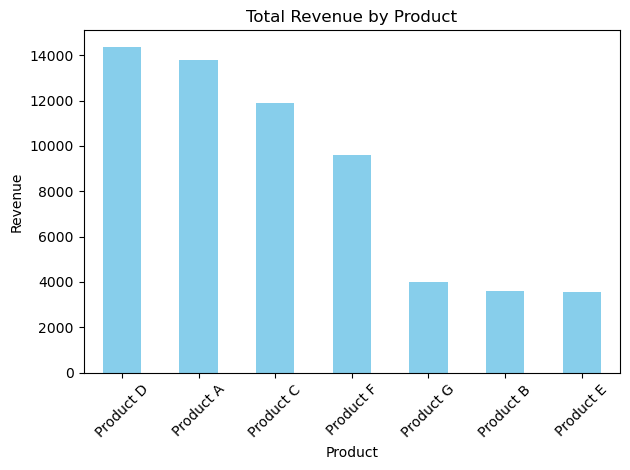

In [14]:
df1.plot(kind='bar', x='product', y='revenue', title='Total Revenue by Product', color='skyblue', legend=False)
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Total Quantity Sold Per Region

In [15]:
query2 = """
SELECT region, 
       SUM(quantity) AS total_quantity
FROM sales
GROUP BY region
ORDER BY total_quantity DESC
"""

df2 = pd.read_sql_query(query2, conn)
print(df2)


  region  total_quantity
0  South              54
1  North              50
2   East              34
3   West              28


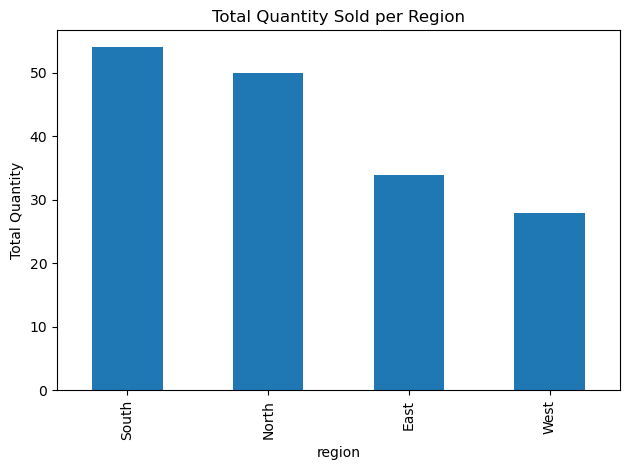

In [16]:
df2.plot(kind='bar', x='region', y='total_quantity', title='Total Quantity Sold per Region', legend=False)
plt.ylabel("Total Quantity")
plt.tight_layout()
plt.show()


### Total Revenue Per Category

In [17]:
query3 = """
SELECT category, 
       ROUND(SUM(quantity * price), 2) AS total_revenue
FROM sales
GROUP BY category
ORDER BY total_revenue DESC
"""

df3 = pd.read_sql_query(query3, conn)
print(df3)


      category  total_revenue
0    Furniture        27984.0
1  Electronics        25699.2
2     Clothing         7152.0


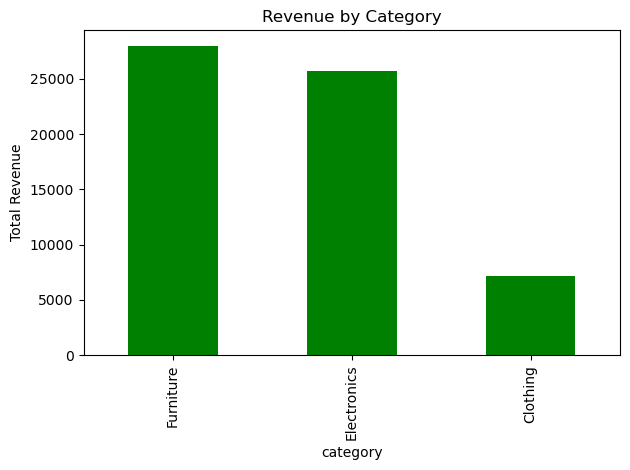

In [18]:
df3.plot(kind='bar', x='category', y='total_revenue', title='Revenue by Category', legend=False, color='green')
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


### Daily Sales Summary

In [19]:
query4 = """
SELECT sale_date, 
       SUM(quantity) AS total_qty, 
       ROUND(SUM(quantity * price), 2) AS total_revenue
FROM sales
GROUP BY sale_date
ORDER BY sale_date
"""

df4 = pd.read_sql_query(query4, conn)
print(df4)


    sale_date  total_qty  total_revenue
0  2025-06-01         26       11393.80
1  2025-06-02         18        2691.00
2  2025-06-03         50       16965.84
3  2025-06-04         24        4787.88
4  2025-06-05         28       11996.82
5  2025-06-06         16        8199.86
6  2025-06-07          4        4800.00


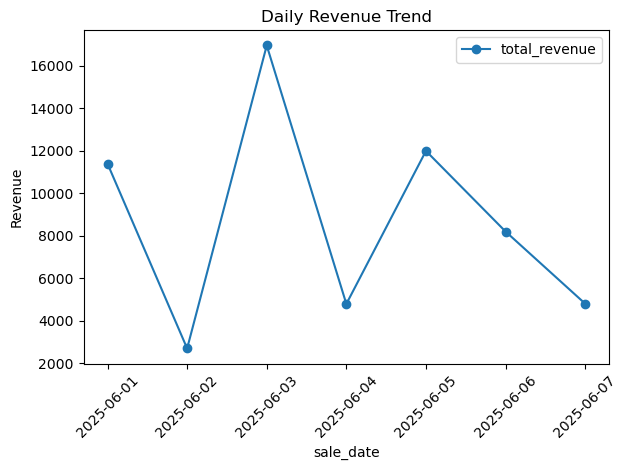

In [20]:
df4.plot(x='sale_date', y='total_revenue', kind='line', marker='o', title='Daily Revenue Trend')
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
